### 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of [this dataset from Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [1]:
import numpy as np
import pandas as pd
from  sklearn import preprocessing as pre
from sklearn import linear_model
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett
from scipy.stats import levene

In [2]:
#Record versions of modules used for future reference
import pkg_resources
resources = ('numpy', 'pandas', 'matplotlib', 'sklearn', 'seaborn', 'sqlalchemy', 'scipy')
version_dict = { i : pkg_resources.get_distribution(i).version for i in resources }
version_dict

{'numpy': '1.16.4',
 'pandas': '0.25.0',
 'matplotlib': '3.1.1',
 'sklearn': '0.0',
 'seaborn': '0.9.0',
 'sqlalchemy': '1.3.6',
 'scipy': '1.3.0'}

In [3]:
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'weatherinszeged'
dialect = 'postgresql'

In [4]:
db_location = f"{dialect}://{user}:{pw}@{host}:{port}/{db}"
engine = create_engine(db_location)

sql = '''
SELECT
    *
FROM
    weatherinszeged
'''
raw_df = pd.read_sql(sql, con=engine)
engine.dispose()

In [5]:
weather_df = raw_df.copy()

In [6]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Build a regression model:
The target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [7]:
lrm = linear_model.LinearRegression()
X = weather_df[["humidity", "windspeed", "windbearing", "pressure"]]
y = weather_df[["temperature"]]
lrm.fit(X, y)
print("coefficients are {} and intercept of {}".format(lrm.coef_, lrm.intercept_))

coefficients are [[-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]] and intercept of [37.92643819]


### Investigate errors

In [8]:
predictions = lrm.predict(X)
errors = y - predictions

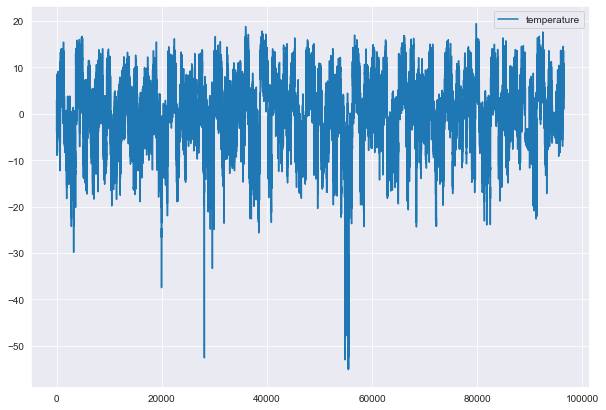

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7)) 
sns.lineplot(data=errors);

#### Homoscedasticity

In [41]:
predictions, errors = predictions.reshape(1,-1)[0], errors.values.reshape(1,-1)[0]

In [43]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)
print("Bartlett test p value is {0:.4f}".format(bart_stats[1]))
print("Levene test p value is {0:.4f}".format(lev_stats[1]))

Bartlett test p value is 0.0000
Levene test p value is 0.0000


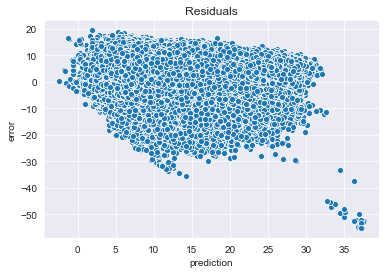

In [44]:
ax = sns.scatterplot(x=predictions, y=errors)
ax.set(xlabel='prediction', ylabel='error', title='Residuals')
plt.show();

### Check for multicolinearity

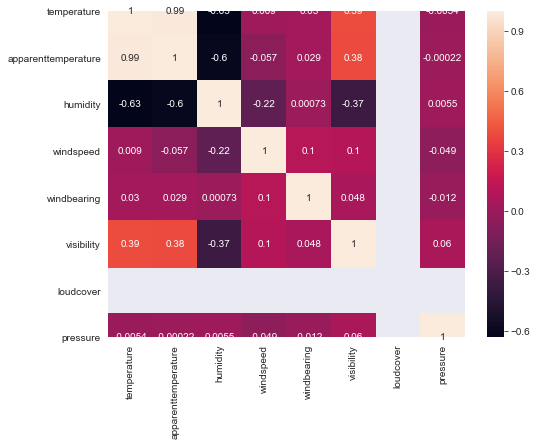

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(weather_df.corr(), annot=True)

There are likley some multicolinearity issues here.

## Autocorrelation

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


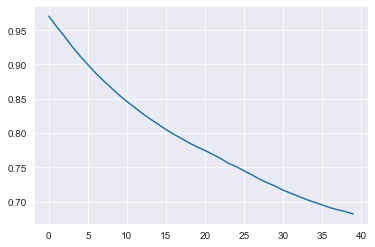

In [53]:
from statsmodels.tsa.stattools import acf
acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

In [ ]:
This seems problematic. 